In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization

In [ ]:
# optional
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/dataset/Chocolate Sales.csv' #your path from drive

df = pd.read_csv(data)

In [ ]:
df.head(15)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,06-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,04-Jul-22,"$2,835",102


In [ ]:
df.shape

(1094, 6)

In [ ]:
df.dtypes

,0
Sales Person,object
Country,object
Product,object
Date,object
Amount,object
Boxes Shipped,int64


In [ ]:
# to check unique values in each column

for var in df.columns:
    print(var)
    print(df[var].value_counts())

Sales Person
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64
Country
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64
Product
Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco     

In [ ]:
# to change data type of column date from object to date


df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Date'].head(5)

,Date
0,2022-01-04
1,2022-08-01
2,2022-07-07
3,2022-04-27
4,2022-02-24


In [ ]:
# converting amount column to float
# Remove $ and commas, then convert to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.dtypes

,0
Sales Person,object
Country,object
Product,object
Date,datetime64[ns]
Amount,float64
Boxes Shipped,int64


Exploratory Data Analysis (EDA)

In [ ]:
# 1. What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise, and Others)? How do their performances compare?
revenue_by_group = df.groupby('Sales Person')['Amount'].sum().reset_index()
revenue_by_group.sort_values(by='Amount', ascending=False)

,Sales Person,Amount
5,Ches Bonnell,320901.0
20,Oby Sorrel,316645.0
17,Madelene Upcott,316099.0
3,Brien Boise,312816.0
16,Kelci Walkden,311710.0
23,Van Tuxwell,303149.0
7,Dennison Crosswaite,291669.0
2,Beverie Moffet,278922.0
14,Kaine Padly,266490.0
19,Marney O'Breen,259742.0


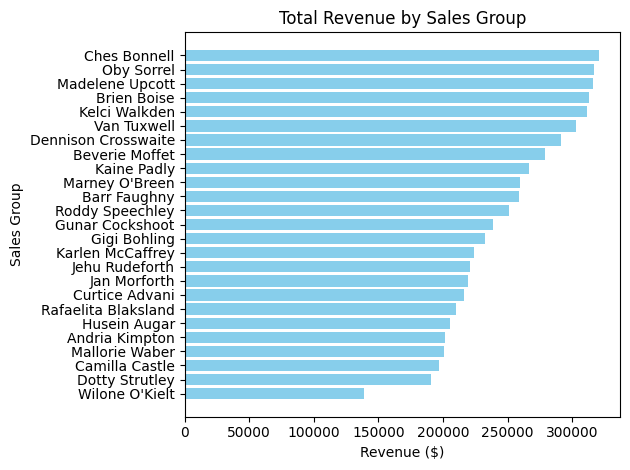

'comment : hence according to the bar chart the highest revenue is generated by ches bonnell an the lowest is wilone '

In [ ]:
# Plot horizontal bar chart
revenue_by_group = revenue_by_group.sort_values(by='Amount', ascending=True)
plt.barh(revenue_by_group['Sales Person'], revenue_by_group['Amount'], color='skyblue')
plt.title('Total Revenue by Sales Group')
plt.xlabel('Revenue ($)')
plt.ylabel('Sales Group')

plt.tight_layout()
plt.show()

"""comment : hence according to the bar chart the highest revenue is generated by ches bonnell an the lowest is wilone """

In [ ]:
# 2:  Which country (Australia, India, or Others) contributes the most to the total sales revenue? What percentage of the total revenue does it account for?
revenue_by_group = df.groupby('Country')['Amount'].sum().reset_index()
revenue_by_group.sort_values(by='Amount', ascending=False)

,Country,Amount
0,Australia,1137367.0
4,UK,1051792.0
2,India,1045800.0
5,USA,1035349.0
1,Canada,962899.0
3,New Zealand,950418.0


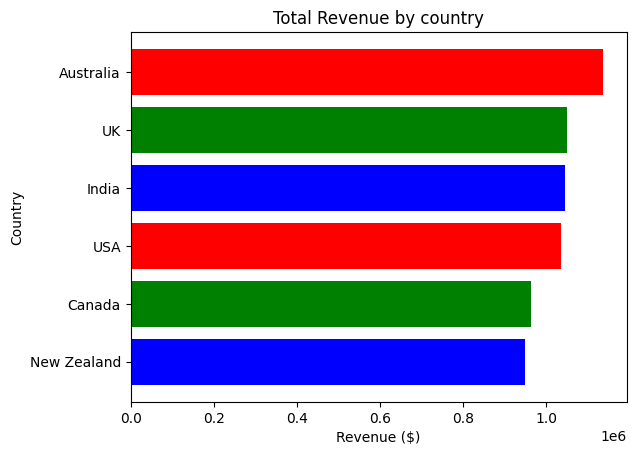

' comment : the country that contribute to the total sales group is Australia '

In [ ]:
# Plot horizontal bar chart
revenue_by_group = revenue_by_group.sort_values(by='Amount', ascending=True)
plt.barh(revenue_by_group['Country'], revenue_by_group['Amount'], color=['blue', 'green', 'red'])
plt.title('Total Revenue by country')
plt.xlabel('Revenue ($)')
plt.ylabel('Country')
plt.show()

""" comment : the country that contribute to the total sales group is Australia """

In [ ]:
# What percentage of the total revenue does it account for?


# Summing the total revenue per country

total_revenue_per_country = df.groupby('Country')['Amount'].sum()


# Total revenue from all countries
total_revenue = df['Amount'].sum()

# Country with the highest contribution
top_country_revenue = total_revenue_per_country.max()


# Percentage of total revenue
percentage_contribution = (top_country_revenue / total_revenue) * 100

percentage_contribution

np.float64(18.393207867553418)

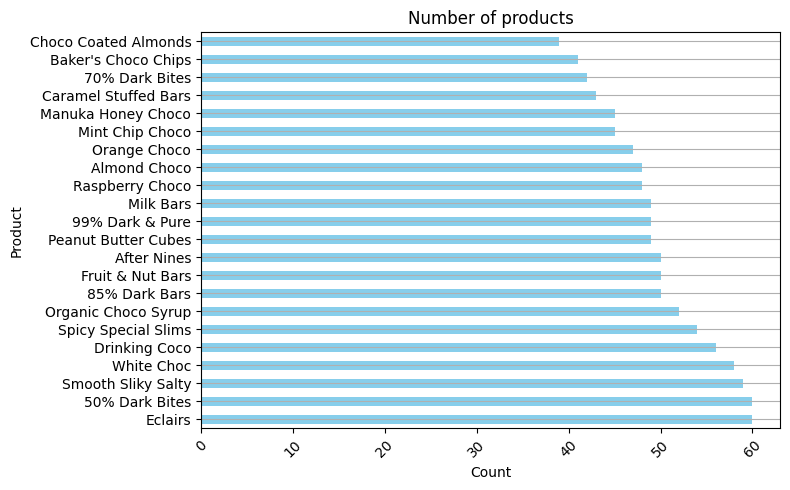

In [ ]:
# 3:  How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites, Eclairs, or Others) has the highest number of transactions?

# hence the unique products are
# Count how many times each product appears
Products_counts = df['Product'].value_counts()

# Plot as bar chart
Products_counts.plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.title('Number of products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# the product which has highest no of transcation is
""" comment : hence the eclairs has highest no of transcation through graph and calculation we can see that """
value=df['Product'].value_counts()
value

,count
Product,
Eclairs,60
50% Dark Bites,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


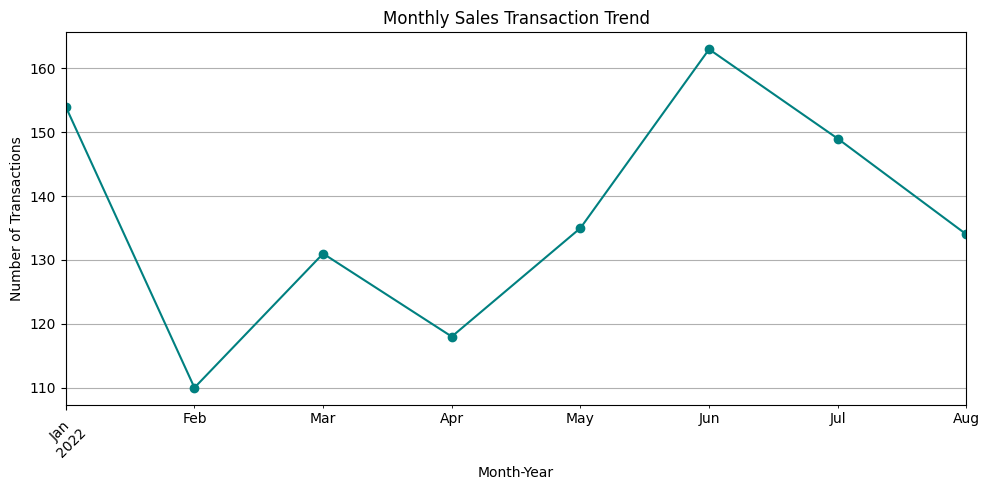

'comment : hence the month with highest transcation is june '

In [ ]:
# 4:  What is the trend of sales over time based on the Date column? Identify the month or period with the highest transaction count

monthly_counts = df.groupby(df['Date'].dt.to_period('M')).size()

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Transaction Trend')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""comment : hence the month with highest transcation is june """

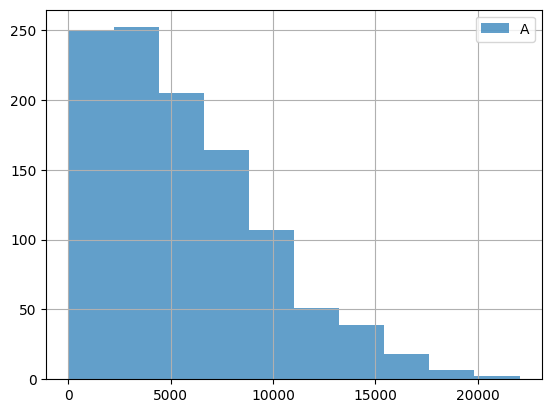

' comment : hence the amount column is positively skewed '

In [ ]:
# 5:  What is the distribution of the Amount column? Are there any outliers in the revenue generated per transaction (e.g., values above 638.20 or below 1.00)?

df['Amount'].hist(bins=10, alpha=0.7, label='A')

plt.legend()
plt.show()

""" comment : hence the amount column is positively skewed """

In [ ]:
# Are there any outliers in the revenue generated per transaction (e.g., values above 638.20 or below 1.00)?

# Define the outlier threshold
threshold_low = 1.00
threshold_high = 638.20

# Identify outliers based on the given thresholds
outliers = df[(df['Amount'] > threshold_high) | (df['Amount'] < threshold_low)]

# Display outliers
print("Outliers in dataset")

outliers

Outliers in dataset


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1087,Beverie Moffet,India,Almond Choco,2022-05-24,3066.0,96
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


In [ ]:
# 6. How does the number of Boxes Shipped correlate with the Amount? Is there a strong relationship between these two variables?

# Calculate the Pearson correlation coefficient
correlation = df['Amount'].corr(df['Boxes Shipped'])

# Print the correlation coefficient
print(f"Correlation coefficient between 'Amount' and 'Boxes Shipped': {correlation}")

"""comment : hence according to correlation value they have weak relationship between them  """

Correlation coefficient between 'Amount' and 'Boxes Shipped': -0.01882685367583422


'comment : hence according to correlation value they have weak relationship between them  '

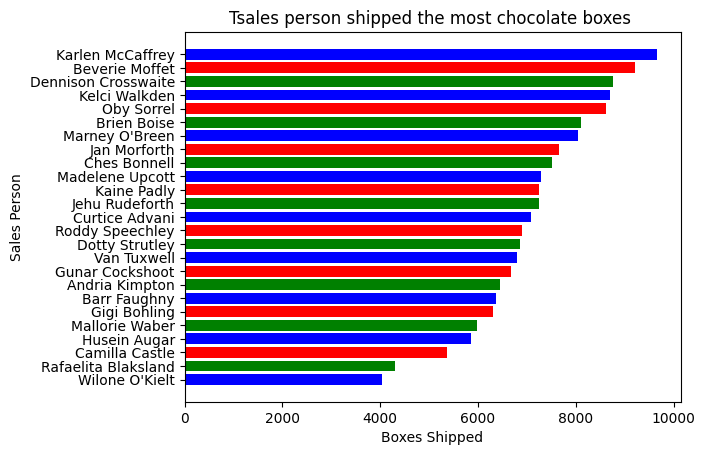

'comment :  the person who shipped the most boxes is karlen mcCaffery '

In [ ]:
# 7. Which salesperson shipped the most boxes of chocolate? Does this align with their total revenue contribution?
person = df.groupby('Sales Person')['Boxes Shipped'].sum().reset_index()
person= person.sort_values(by='Boxes Shipped', ascending=True)
plt.barh(person['Sales Person'],person['Boxes Shipped'], color=['blue', 'green', 'red'])
plt.title('Tsales person shipped the most chocolate boxes ')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Person')
plt.show()

"""comment :  the person who shipped the most boxes is karlen mcCaffery """

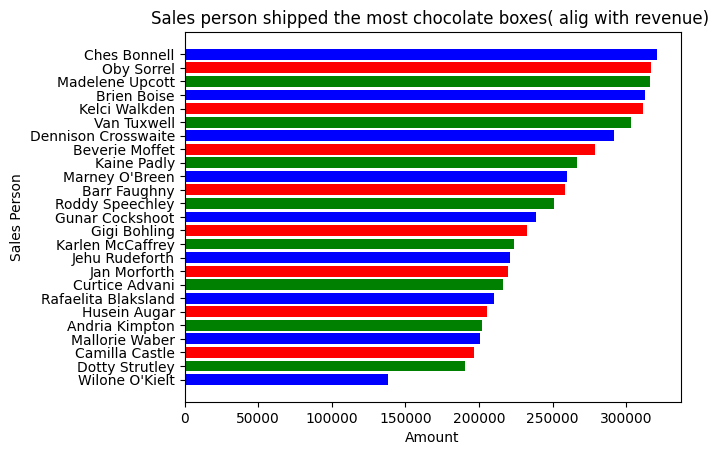

'comment : no its not alig with the total revenue contribution (the person who shipped the most boxes is karlen mccaffery\nwhile if we look through revenue than it is ches bonnell ) '

In [ ]:

person = df.groupby('Sales Person')['Amount'].sum().reset_index()
person= person.sort_values(by='Amount', ascending=True)
plt.barh(person['Sales Person'],person['Amount'], color=['blue', 'green', 'red'])
plt.title('Sales person shipped the most chocolate boxes( alig with revenue) ')
plt.xlabel('Amount')
plt.ylabel('Sales Person')
plt.show()

"""comment : no its not alig with the total revenue contribution (the person who shipped the most boxes is karlen mccaffery
while if we look through revenue than it is ches bonnell ) """

**Data Cleaning**

In [ ]:
# 8:  Are there any missing values in the dataset (e.g., in Sales Person, Country, Product, Date, Amount, or Boxes Shipped)? How would you handle them?
df.isnull().sum()
""" comment : no there are no missing values in the data set"""

' comment : no there are no missing values in the data set'

In [ ]:
# 9:  The dataset shows date ranges (e.g., 07/14/2022 - 08/07/2022). Should these be split into individual dates or kept as ranges? Justify your choice and suggest a cleaning approach.


"""comment : since our dataset has no ranges of date so we will skip this step """
df.head(20)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
5,Van Tuxwell,India,Smooth Sliky Salty,2022-06-06,5376.0,38
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.0,176
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,3080.0,73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,2022-04-20,3990.0,59
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,2835.0,102


In [ ]:
# 10. The Amount column has a range from 1.00 to 709.00. Are there any negative or unrealistic values that need to be removed? How would you identify and clean them?


# to check for negative or unrealistic value

# Check for negative or zero values
value= df[df['Amount'] <= 0]
value

# hence according to the answer there are no zero or unrealistic value

,Sales Person,Country,Product,Date,Amount,Boxes Shipped


In [ ]:
""" 11. The Country and Product columns have "Other" categories (64% and 89%,
respectively). Should these be treated as a single category, or should you attempt to break
them down further? Why?"""
df['Product'].value_counts()

,count
Product,
Eclairs,60
50% Dark Bites,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


In [ ]:
# 12. Are there duplicate transactions in the dataset (e.g., same Sales Person, Date, Product, Amount, and Boxes Shipped)? How would you detect and resolve them?


df.duplicated().sum() # comment :hence there are no duplicates in the data set

np.int64(0)

In [ ]:
# identify outliers

# for boxes shipped column
Q1 = df['Boxes Shipped'].quantile(0.25)
Q3 = df['Boxes Shipped'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Boxes Shipped'] < Q1 - 1.5*IQR) | (df['Boxes Shipped'] > Q3 + 1.5*IQR)]
outliers

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
39,Karlen McCaffrey,India,Manuka Honey Choco,2022-07-04,2443.0,581
97,Kelci Walkden,UK,Fruit & Nut Bars,2022-06-29,13006.0,482
109,Jan Morforth,India,Spicy Special Slims,2022-04-12,1939.0,520
121,Kelci Walkden,Australia,Eclairs,2022-03-23,7273.0,547
150,Camilla Castle,Australia,70% Dark Bites,2022-04-29,6048.0,477
171,Kelci Walkden,India,After Nines,2022-01-07,1687.0,520
188,Husein Augar,New Zealand,Caramel Stuffed Bars,2022-01-27,497.0,475
340,Kaine Padly,UK,Smooth Sliky Salty,2022-06-08,9016.0,554
445,Beverie Moffet,Australia,Smooth Sliky Salty,2022-01-25,10507.0,467
458,Roddy Speechley,India,Caramel Stuffed Bars,2022-05-30,8911.0,543


In [ ]:
# comment : we will handle outliers of boxed shipped column through capping

# Set capping limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Apply capping
df['Boxes Shipped'] = np.where(df['Boxes Shipped'] > upper_limit, upper_limit,
                              np.where(df['Boxes Shipped'] < lower_limit, lower_limit, df['Boxes Shipped']))

print(df)

          Sales Person    Country              Product       Date   Amount  \
0       Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1          Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2         Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3         Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4       Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   
...                ...        ...                  ...        ...      ...   
1089  Karlen McCaffrey  Australia  Spicy Special Slims 2022-05-17   4410.0   
1090    Jehu Rudeforth        USA           White Choc 2022-06-07   6559.0   
1091      Ches Bonnell     Canada  Organic Choco Syrup 2022-07-26    574.0   
1092    Dotty Strutley      India              Eclairs 2022-07-28   2086.0   
1093  Karlen McCaffrey      India       70% Dark Bites 2022-05-23   5075.0   

      Boxes Shipped  
0             180.0  
1              94.0

In [ ]:
# for amount column

""" comment : for amount column  we will keep the outliers. beacuse some product price is high so we cannot remove them """

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < Q1 - 1.5*IQR) | (df['Amount'] > Q3 + 1.5*IQR)]
outliers

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
57,Brien Boise,Canada,99% Dark & Pure,2022-05-18,16793.0,416.0
66,Van Tuxwell,Australia,Organic Choco Syrup,2022-08-10,19453.0,14.0
119,Kelci Walkden,USA,Manuka Honey Choco,2022-02-16,17318.0,87.0
135,Van Tuxwell,India,Organic Choco Syrup,2022-05-16,19929.0,174.0
212,Marney O'Breen,UK,Smooth Sliky Salty,2022-05-13,18991.0,88.0
257,Ches Bonnell,India,Organic Choco Syrup,2022-03-08,16569.0,99.0
372,Dotty Strutley,USA,Caramel Stuffed Bars,2022-04-15,16982.0,76.0
434,Jan Morforth,New Zealand,Mint Chip Choco,2022-06-30,18340.0,285.0
543,Ches Bonnell,India,Peanut Butter Cubes,2022-01-27,22050.0,208.0
589,Curtice Advani,India,Smooth Sliky Salty,2022-04-19,19327.0,135.0


**Business Expectations**

In [ ]:
# 13. Based on the dataset, which salesperson should the chocolate company recognize as thetop performer? Justify your answer using revenue and boxes shipped.

""" comment : after watching the two charts we analyze that
     1: if the company is choosing top performmer in terms of revenue than  the sales person who has highest revenue is ches bonnell
     2: if the company is choosing top performmer in terms of boxes shipped than the sales person who has highest boxes shipped is  karlen mcCaffery """
"""

In [ ]:
# 14. Which country should the company focus on for expanding its chocolate sales? Support your recommendation with data.

""" comment : by analyzing the insights the country company should focus on expanding its sale is australia"""

In [ ]:
""" 15. What insights can you provide about the popularity of chocolate products (e.g., 50% Dark
Bites vs. Eclairs)? How can the company use this to adjust its production or marketing
strategy? """

""" comment : through bar chart we see that eclairs is the chocolate product with the most popularity among the all . company
increase the inventory of this product to avoid any shortage and also company have to run promotional add and discount
for the other products to increase the sale  """

In [ ]:
""" 16. Are there seasonal patterns in chocolate sales (e.g., higher sales in certain months)? How
can the business use this information for inventory planning? """

""" comment : after analyzing the insights through line plot the highest number of sales are in month june

business can use this information like in month june the sales is high
so company have to increase inventory level in this month to avoid shortage of product
also company should run promotions and special offers for this month to increase it sale

same  reduce its inventory level in month of feb as it it is lower sales month to avoid and further loss  """

 **Machine Learning Models (KNN, Decision Tree Classifier, Logistic Regression, Random
Forest)**

**18. Suppose you want to predict whether a transaction will generate "High" revenue (e.g.,
Amount > 355.00) or "Low" revenue (e.g., Amount ≤ 355.00). How would you
preprocess the dataset (e.g., encoding categorical variables like Sales Person, Country,
Product) for use in KNN, Decision Tree, Logistic Regression, and Random Forest
models? ******

In [ ]:
# as according to condition "High" revenue (e.g., Amount > 355.00) or "Low" revenue (e.g., Amount ≤ 355.00) we will converting amount column  from contionous to categorical


""" comment : where 0 is low , and 1 is high"""


# Create a amount column: High if Amount > 355
df['Amount'] = df['Amount'].apply(lambda x: 1 if x > 355.00 else 0)

df.head(20)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,1,180.0
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,1,94.0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,1,91.0
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,1,342.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,1,184.0
5,Van Tuxwell,India,Smooth Sliky Salty,2022-06-06,1,38.0
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,1,176.0
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,1,73.0
8,Jehu Rudeforth,New Zealand,50% Dark Bites,2022-04-20,1,59.0
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,1,102.0


In [ ]:
# to convert categorical column to numeric we are applying encoding

# since categorical column are Salesperson ,country and product

"""  comment :
  1: the column sales person has  25 unique values so we are not going to apply one
 hot encoding on this column we are going to drop the columns as it will increase the dataset size which is not good approach (unstructured data)

 2: we also dropping the date column which is of no use in this dataset

 """

df = df.drop(['Sales Person','Date'], axis=1)

In [ ]:
df.head(2)

,Product,Amount,Boxes Shipped,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA
0,Mint Chip Choco,1,180.0,False,False,False,True,False
1,85% Dark Bars,1,94.0,False,True,False,False,False


In [ ]:
# and we are going to apply one hot encoding on country column as their is no hierarchy
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [ ]:
"""we will also apply one hot encoding to the product column although it has 22 unique \
faetures through one hot encoding our dataset length will get increase  but according to the question
take product as input feature so we will apply the encoding """

df = pd.get_dummies(df, columns=['Product'], drop_first=True)

In [ ]:
# applying scaling to the columns (continous numerical column )
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()
numeric_columns = ['Boxes Shipped']
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

In [ ]:
# applying z score normalization to skewed column (that are continous )

scaler = StandardScaler()
numeric_columns = ['Boxes Shipped']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

**19. Train a KNN classifier to predict whether a transaction is "High" or "Low" revenue based
on features like Boxes Shipped, Country, and Product. What value of K would you
choose, and why? **** **

In [ ]:
# choosing input and output features

# Step 5: Define input features (X) and output feature (y)
X = df.drop(columns='Amount')  # Input features: Boxes Shipped, Country, Product
y = df['Amount']                # Output feature: High (1) or Low (0)

In [ ]:

# splitting the data into training and testing

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**At k=3**

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predict test result
y_pred = knn.predict(X_test)
# predict the train result
y_pred_train = knn.predict(X_train)

In [ ]:
# compare the accuracy of testing and training set
from sklearn.metrics import accuracy_score

# print the scores on training and test set

# print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
# or
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
# or
print('test score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


"""comment : hence test score is more than training score. so there is no overfitting """

Training-set accuracy score: 0.9646
test score: 0.9726


'comment : hence test score is more than training score. so there is no overfitting '

In [ ]:
# check class distribution in test set

y_test.value_counts()

,count
Amount,
1,215
0,4


In [ ]:
# check null accuracy score

null_accuracy = (215/(215+4))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9817


* hence model test accuracy 0.9726 is null accuracy score is 0.9817 so we are not considering k=3

**At k=5**

In [ ]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)

# Compare the two:

# predict on the test-set
y_pred_5 = knn_5.predict(X_test)
# predict the train result
y_pred_train = knn_5.predict(X_train)

print('training set score with k=5 :', format(accuracy_score(y_train, y_pred_train)))
print('Test score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

# or

# print('Training set score: {:.4f}'.format(knn_5.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(knn_5.score(X_test, y_test)))

training set score with k=5 : 0.9622857142857143
Test score with k=5 : 0.9726


**At k=7**

In [ ]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)

# Compare the two:

# predict on the test-set
y_pred_7= knn_7.predict(X_test)
# predict the train result
y_pred_train = knn_7.predict(X_train)

print('training set score with k=7 :', format(accuracy_score(y_train, y_pred_train)))
print('Test score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

# or

# print('Training set score: {:.4f}'.format(knn_5.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(knn_5.score(X_test, y_test)))

training set score with k=7 : 0.9634285714285714
Test score with k=7 : 0.9772


In [ ]:
# instantiate the model with k=9
knn_9= KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)

# Compare the two:

# predict on the test-set
y_pred_9 = knn_9.predict(X_test)
# predict the train result
y_pred_train = knn_9.predict(X_train)

print('training set score with k=9 :', format(accuracy_score(y_train, y_pred_train)))
print('Test score with k=9: {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

# or

# print('Training set score: {:.4f}'.format(knn_5.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(knn_5.score(X_test, y_test)))

training set score with k=9 : 0.9622857142857143
Test score with k=9: 0.9817


In [ ]:
# instantiate the model with k=11
knn_10 = KNeighborsClassifier(n_neighbors=11)


# fit the model to the training set
knn_10.fit(X_train, y_train)

# Compare the two:

# predict on the test-set
y_pred_10 = knn_10.predict(X_test)
# predict the train result
y_pred_train = knn_10.predict(X_train)

print('training set score with k=11 :', format(accuracy_score(y_train, y_pred_train)))
print('Test score with k=11 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10)))

# or

# print('Training set score: {:.4f}'.format(knn_5.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(knn_5.score(X_test, y_test)))

training set score with k=11 : 0.9622857142857143
Test score with k=11 : 0.9817


In [ ]:

from sklearn.metrics import confusion_matrix
cm_3 = confusion_matrix(y_test, y_pred) # at 3
cm_5 = confusion_matrix(y_test, y_pred_5) # at 5
cm_7 = confusion_matrix(y_test, y_pred_7) # at 7
cm_9 = confusion_matrix(y_test, y_pred_9) # at 9
cm_11 = confusion_matrix(y_test, y_pred_10) # at 9

<Axes: >

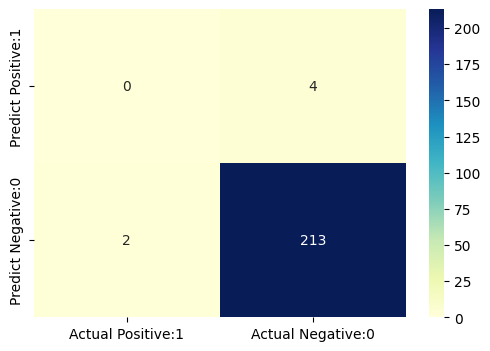

In [ ]:
# confusion matrix at 3
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_3, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

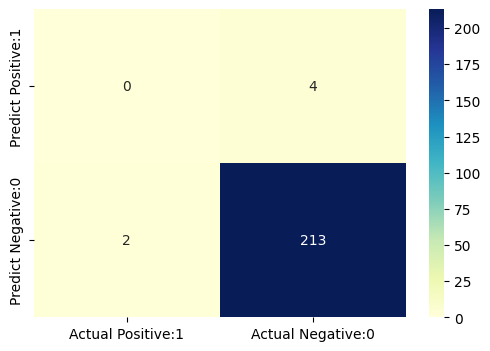

In [ ]:
# confusion matrix at 5
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_5, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

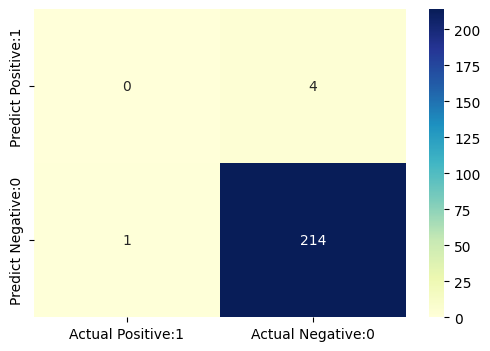

In [ ]:
# confusion matrix at 7
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

' comment : hence confusion matrix is good in k=9 because false positive value is 0 (confusion matrix become better)'

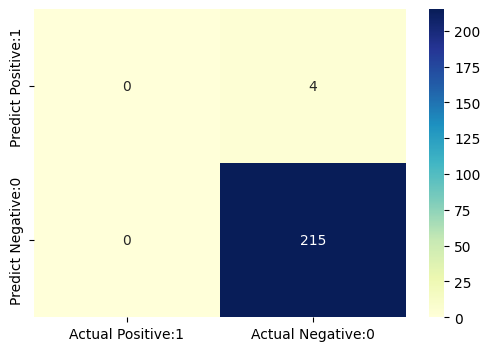

In [ ]:
# confusion matrix at 9
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_9, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

""" comment : hence confusion matrix is good in k=9 because false positive value is 0 (confusion matrix become better)"""

<Axes: >

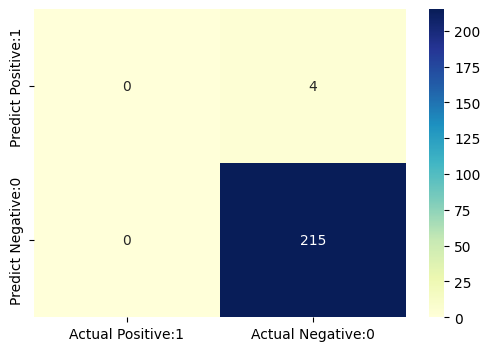

In [ ]:
# confusion matrix at 11
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_11, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print("At : 3")
print(classification_report(y_test, y_pred))
print("At : 5")
print(classification_report(y_test, y_pred_5))
print("At : 7")
print(classification_report(y_test, y_pred_7))
print("At : 9")
print(classification_report(y_test, y_pred_9))

At : 3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.99      0.99       215

    accuracy                           0.97       219
   macro avg       0.49      0.50      0.49       219
weighted avg       0.96      0.97      0.97       219

At : 5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.99      0.99       215

    accuracy                           0.97       219
   macro avg       0.49      0.50      0.49       219
weighted avg       0.96      0.97      0.97       219

At : 7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       215

    accuracy                           0.98       219
   macro avg       0.49      0.50      0.49       219
weighted avg       0.96      0.98      0.97       219

**ROC Curve**

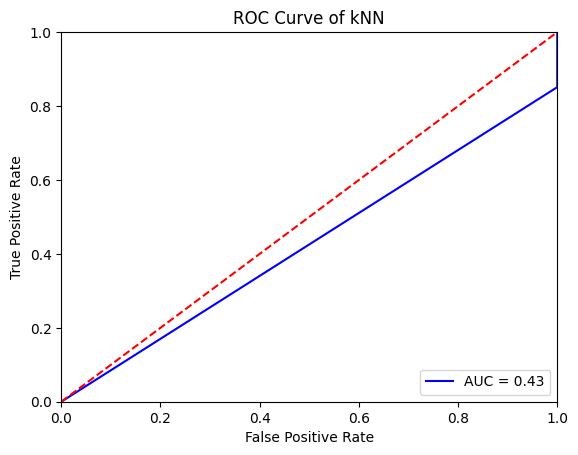

In [ ]:
# AT : 3
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Roc Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

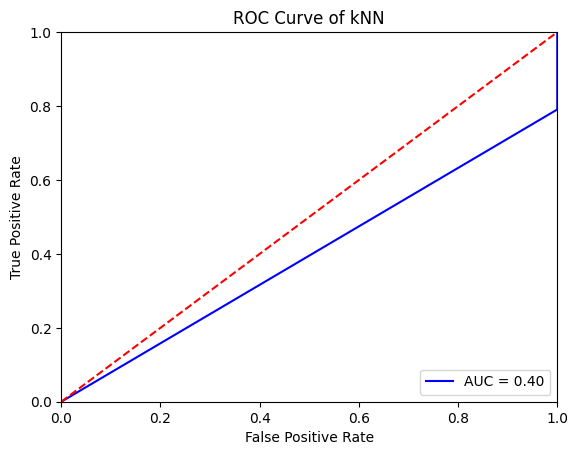

In [ ]:
# AT : 5
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = knn_5.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Roc Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

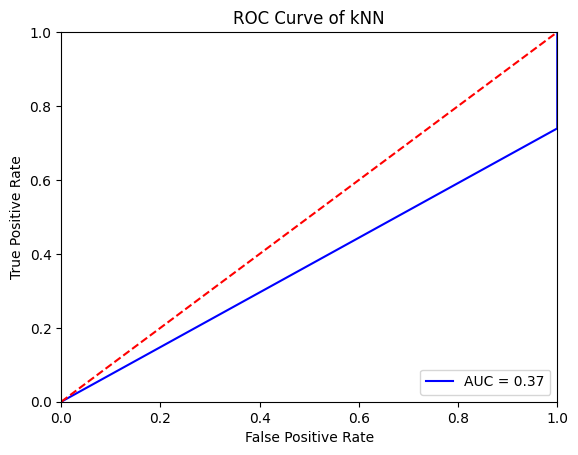

In [ ]:
# AT : 7
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = knn_7.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Roc Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

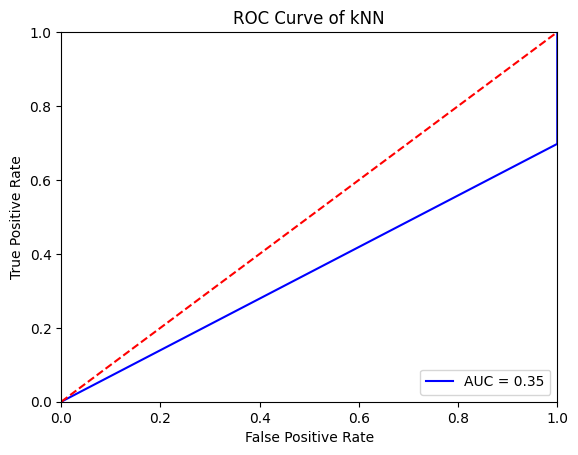

' comment : AT k=9 area uner the curve is more than all k values '

In [ ]:
# AT : 9
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = knn_9.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Roc Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

""" comment : AT k=9 area uner the curve is more than all k values """

# hence we  choose  k= 9 ,

**WHY?**
**

1: i will choose **k=9** because **test score** is higher in k=9 which is **0.9817 **and **training score** is less** 0.9622** than other values of k  

2: **there is no overfitting or underfitting**

2: **test score at  k= 9** is **0.9817** **and null accuracy :** **0.9817**( there is a little problem according to knn test score should be high than null accuracy but they are same at k=9 (while testing with other values the test score is coming low than null accuracy )

4: at** k=9 confusion metrix** is good (FP are less in k=9 than other k values


at k =9 our precision and recall are

**1:to predict high revenue(1)
**our precision is 0.98%** (How many predicted high revenue are correct)
**and recall is 1.00** (How many actual high revenue were predicted right)
**which is good hence it is precicting high revenue good **

2: to predict low revenue(0)
**our precision and recall is 0.00 **which means our model is not good working on low revenue**

3: our auc value is also low at k=9 which is 0.35

**conclusion : hence knn is performing good in high revenue
but in low reveneue it is performing worst**

 **


**20. Build a Decision Tree Classifier to predict the same "High" vs. "Low" revenue outcome.
Which feature (e.g., Boxes Shipped, Country, Sales Person) is the most important in
splitting the data? How do you interpret this?**

In [ ]:
""" comment : Sales Person is not the most important feature in training the data  because it has unstructured data if we will
 encode this column as a result our dataset become unnecessarily large . so we will drop this column """

' comment : Sales Person is not the most important feature in training the data  because it has unstructured data if we will\n encode this column as a result our dataset become unnecessarily large . so we will drop this column '

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.970588    1.000000  0.998857    0.985294      0.998891
recall      1.000000    0.998812  0.998857    0.999406      0.998857
f1-score    0.985075    0.999406  0.998857    0.992240      0.998865
support    33.000000  842.000000  0.998857  875.000000    875.000000
_______________________________________________
Confusion Matrix: 
 [[ 33   0]
 [  1 841]]

Test Result:
Accuracy Score: 93.61%
_______________________________________________
CLASSIFICATION REPORT:
             0           1  accuracy   macro avg  weighted avg
precision  0.0    0.980861  0.936073    0.490431      0.962946
recall     0.0    0.953488  0.936073    0.476744      0.936073
f1-score   0.0    0.966981  0.936073    0.483491      0.949319
support    4.0  215.000000  0.936073  219.000000    219.000000
_________________________________

Boxes Shipped                   0.567144
Country_India                   0.062596
Country_USA                     0.056023
Country_UK                      0.055577
Product_Spicy Special Slims     0.055464
Country_New Zealand             0.039060
Country_Canada                  0.035403
Product_Fruit & Nut Bars        0.029616
Product_Peanut Butter Cubes     0.021330
Product_Choco Coated Almonds    0.015302
Product_Milk Bars               0.012844
Product_Smooth Sliky Salty      0.009823
Product_After Nines             0.007429
Product_70% Dark Bites          0.007158
Product_Orange Choco            0.004619
Product_Drinking Coco           0.004210
Product_Baker's Choco Chips     0.003374
Product_Mint Chip Choco         0.003319
Product_Manuka Honey Choco      0.003201
Product_Caramel Stuffed Bars    0.002331
Product_99% Dark & Pure         0.001871
Product_Organic Choco Syrup     0.001159
Product_Almond Choco            0.001149
Product_85% Dark Bars           0.000000
Product_Eclairs 

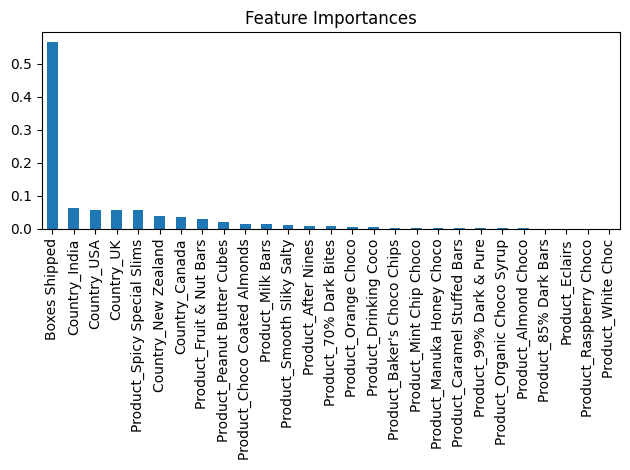

In [ ]:
# Feature importances
importances = pd.Series(dt_clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

# Plot
importances.plot(kind='bar', title='Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
# comment hence according to the graph boxes shipped is the most important feature among all the other features.

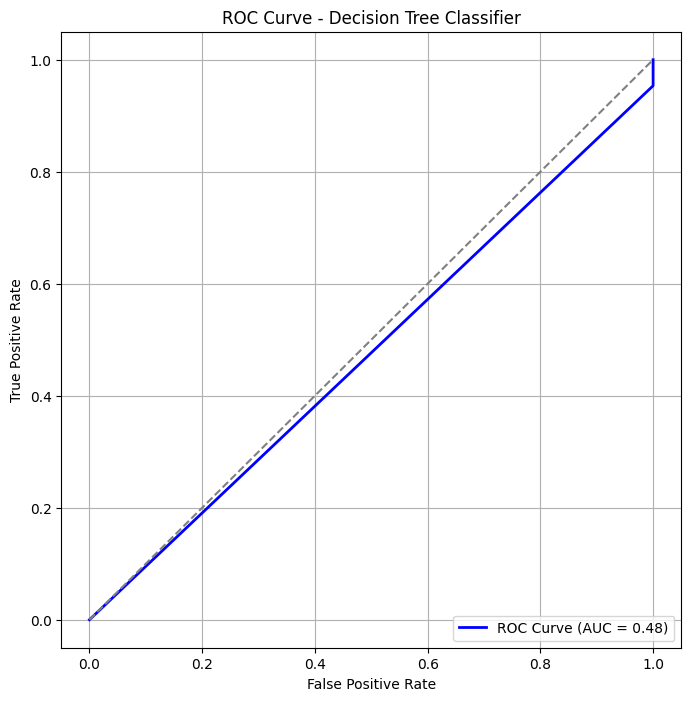

In [ ]:
# ROC Curve for decision tree

# Predict probabilities instead of classes
y_probs = dt_clf.predict_proba(X_test)[:, 1]  # Get probabilities for class "1" (High)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Model Evaluation of decision tree classifier**


1: hence it is showing training accuracy greater than test accuracy

2: also test accuracy  which is 93.61% is low than null accuracy 0.9817

3: model is overfitted (training accuracy is high)

4: also confusion matrix at test set is not good fp positive are high

6: auc is also not good

**Talking about precision and recall at train set**

**1: to predict high revenue (1) our precision is 1.00 and recall is 0.99 which is good
2: to predict low revenue (0) our precison is 0.97 and recall is 1.00 which is good
hence it is predicting high revenue and low revenue good in train set**

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 0.95 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion: hence the decision tree classifier on test set it is predicting high revenue good but low revenue worst ( value of precision and recall 0.00)**

 **21. Use Logistic Regression to predict the probability of a transaction being "High" revenue.
How do the coefficients of the model help you understand the impact of Boxes Shipped
on revenue?**

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.23%
_______________________________________________
CLASSIFICATION REPORT:
              0           1  accuracy   macro avg  weighted avg
precision   0.0    0.962286  0.962286    0.481143      0.925994
recall      0.0    1.000000  0.962286    0.500000      0.962286
f1-score    0.0    0.980780  0.962286    0.490390      0.943791
support    33.0  842.000000  0.962286  875.000000    875.000000
_______________________________________________
Confusion Matrix: 
 [[  0  33]
 [  0 842]]

Test Result:
Accuracy Score: 98.17%
_______________________________________________
CLASSIFICATION REPORT:
             0           1  accuracy   macro avg  weighted avg
precision  0.0    0.981735  0.981735    0.490868      0.963804
recall     0.0    1.000000  0.981735    0.500000      0.981735
f1-score   0.0    0.990783  0.981735    0.495392      0.972687
support    4.0  215.000000  0.981735  219.000000    219.000000
_______________________________________________
Confusion 

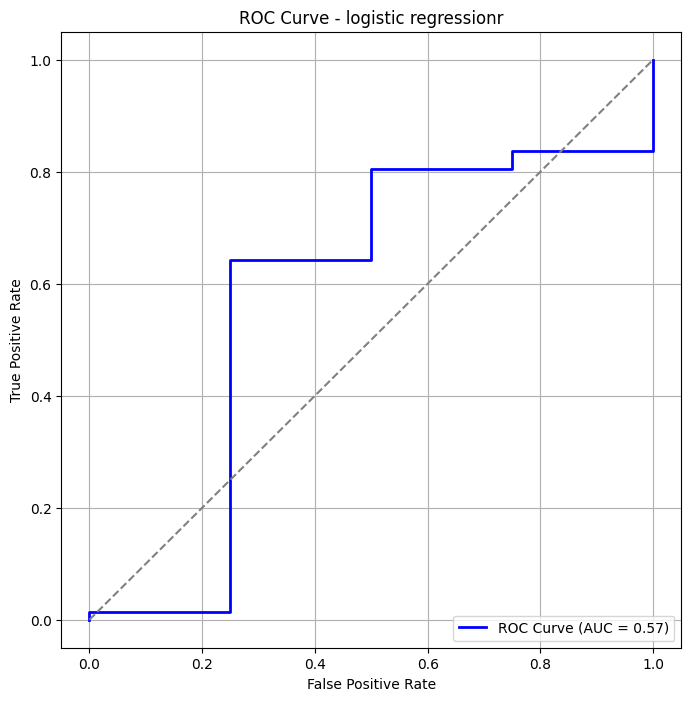

In [ ]:
# ROC Curve for logistic regression

# Predict probabilities instead of classes
y_probs = lr_clf.predict_proba(X_test)[:, 1]  # Get probabilities for class "1" (High)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - logistic regressionr')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Model Evaluation of logistic regression**

1: hence testing accuracy is greater then training accuracy

2: no overfitting

3: null accuracy 0.98 and testing accuracy 98.17% are same

4: also confusion metrix is also good at testing no fp positive

5: But auc ( area under curve value is not good

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 1.00 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion: hence aaccording to the question logistic regression is predicting high revenue very good**

 **22. Implement a Random Forest Classifier to predict "High" vs. "Low" revenue. How does
the ensemble approach improve performance compared to a single Decision Tree? What
is the importance of each feature (e.g., Boxes Shipped, Country) in the Random Forest
model?**

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.998814  0.998857    0.999407      0.998858
recall      0.969697    1.000000  0.998857    0.984848      0.998857
f1-score    0.984615    0.999407  0.998857    0.992011      0.998849
support    33.000000  842.000000  0.998857  875.000000    875.000000
_______________________________________________
Confusion Matrix: 
 [[ 32   1]
 [  0 842]]

Test Result:
Accuracy Score: 96.35%
_______________________________________________
CLASSIFICATION REPORT:
             0           1  accuracy   macro avg  weighted avg
precision  0.0    0.981395   0.96347    0.490698       0.96347
recall     0.0    0.981395   0.96347    0.490698       0.96347
f1-score   0.0    0.981395   0.96347    0.490698       0.96347
support    4.0  215.000000   0.96347  219.000000     219.00000
_________________________________

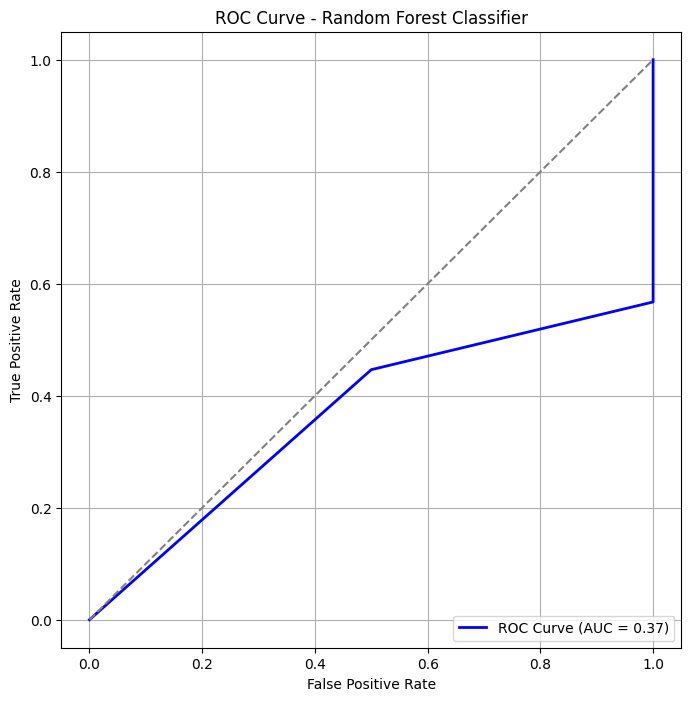

In [ ]:

# ROC Curve for Random Forest
y_probs = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# How does the ensemble approach improve performance compared to a single Decision Tree?
"""comment :

 1: Random forest consist of multiple decision trees on different random subsets of data and features
 so its performance as compared to single decision tree is more effective
 2: it reduce the overfitting
 3: Random forest increases accuracy as test data , and gives better robustness against noise in the data


"""

'comment :\n\n 1: Random forest consist of multiple decision trees on different random subsets of data and features \n so its performance as compared to single decision tree is more effective\n 2: it reduce the overfitting \n 3: Random forest increases accuracy as test data , and gives better robustness against noise in the data\n\n\n'

**Model evaluation of random forest**

1: testing accuracy is low than training accuracy

2: also there is a overfitting

3: also null accuracy 0.9817 is greater than test score 96.35%

4: auc(area under the curve value is not good)

5: confusion matrix at test score value is high as compare to other model (fp are high)

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 0.981 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion : hence in random forest it is predicting high revenue good but not predicting the low revenue**

Boxes Shipped                   0.641802
Country_India                   0.038252
Country_USA                     0.033848
Country_New Zealand             0.032444
Country_UK                      0.031564
Country_Canada                  0.018332
Product_Drinking Coco           0.016815
Product_Spicy Special Slims     0.016813
Product_Peanut Butter Cubes     0.016396
Product_Fruit & Nut Bars        0.016047
Product_After Nines             0.013885
Product_Orange Choco            0.013409
Product_Smooth Sliky Salty      0.013017
Product_Milk Bars               0.011397
Product_Manuka Honey Choco      0.009727
Product_Caramel Stuffed Bars    0.009564
Product_Baker's Choco Chips     0.009291
Product_70% Dark Bites          0.008087
Product_99% Dark & Pure         0.007953
Product_Choco Coated Almonds    0.007648
Product_85% Dark Bars           0.007621
Product_Mint Chip Choco         0.006976
Product_Almond Choco            0.006684
Product_Organic Choco Syrup     0.004406
Product_Eclairs 

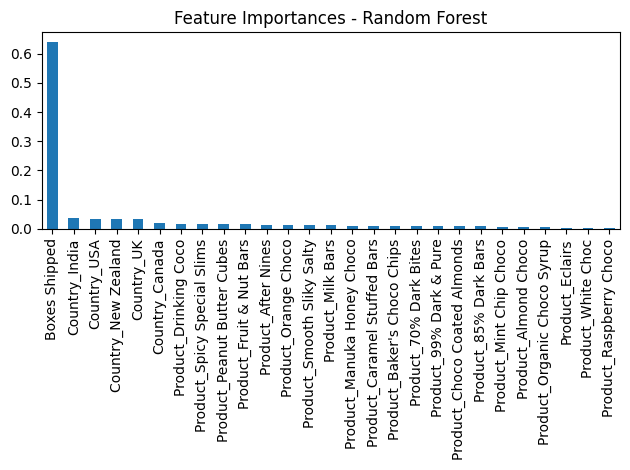

In [ ]:

# What is the importance of each feature (e.g., Boxes Shipped, Country) in the Random Forest model?
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)
# Feature importances

# Plot feature importances
importances.plot(kind='bar', title='Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
# comment :hence the important feature is boxes shipped in random forest

**23. Compare the performance of KNN, Decision Tree, Logistic Regression, and Random
Forest models using accuracy, precision, and recall. Which model performs best for this
classification task, and why?**

**Model evaluation on all the models **

**1: our null accuracy on this data set is : 0.9817**

**Talking about KNN when our k value is 9**

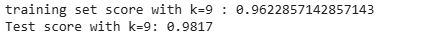

1: our testing set score is higher than training score

2: but testing score and null accuracy are same ( testing accuracy should be greater always )

3: confusion matrix is also good no fp in the metrix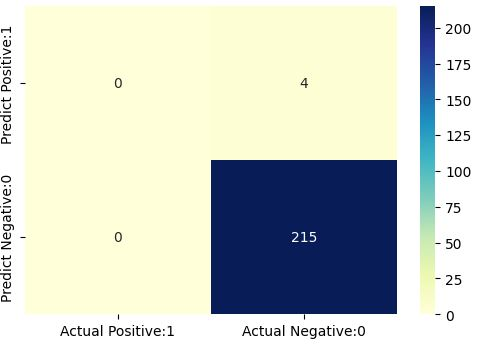
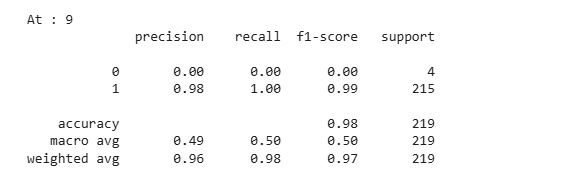

at

**k =9 our precision and recall are**

**1:to predict high revenue(1)
our precision is 0.98% (How many predicted high revenue are correct)
and recall is 1.00 (How many actual high revenue were predicted right)
which is good hence it is precicting high revenue good
2: to predict low revenue(0)
our precision and recall is 0.00  which means our model is not good working on low revenue**

3: our auc value is also low at k=9 which is 0.35

**conclusion : hence after watching precision and recall knn is performing good in high revenue but in low reveneue it is performing worst**

**Model evaluation for decision tree classifier**

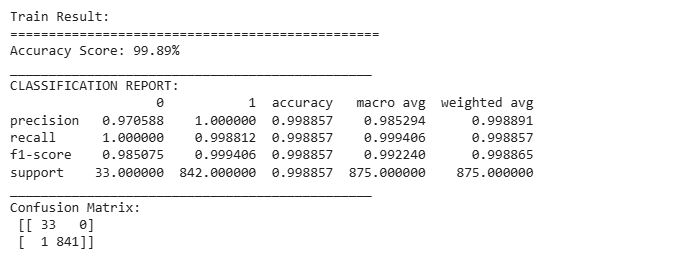

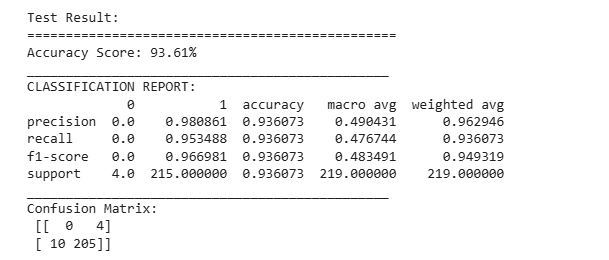

1: hence it is showing training accuracy greater than test accuracy

2: also test accuracy  which is 93.61% is low than null accuracy 0.9817

3: model is overfitted (training accuracy is high)

4: also confusion matrix at test set is not good fp positive are high

6: auc is also not good

**Talking about precision and recall at train set**

**1: to predict high revenue (1) our precision is 1.00 and recall is 0.99 which is good
2: to predict low revenue (0) our precison is 0.97 and recall is 1.00 which is good
hence it is predicting high revenue and low revenue good in train set**

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 0.95 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion: hence the decision tree classifier on test set it is predicting high revenue good but low revenue worst ( value of precision and recall 0.00)**


**Model evaluation for logistic regression**


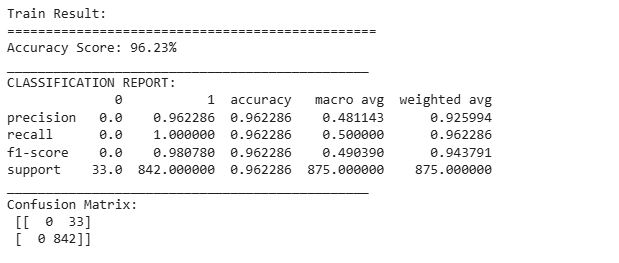



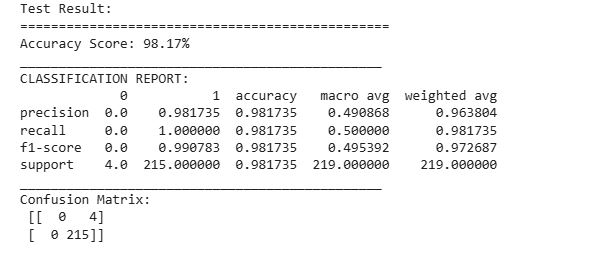


1: hence testing accuracy is greater then training accuracy

2: no overfitting

3: null accuracy 0.98 and testing accuracy 98.17% are same

4: also confusion metrix is also good at testing no fp positive

5: But auc ( area under curve value is not good

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 1.00 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion: hence according to the question logistic regression is predicting high revenue very good**

**Model evaluation of random forest**


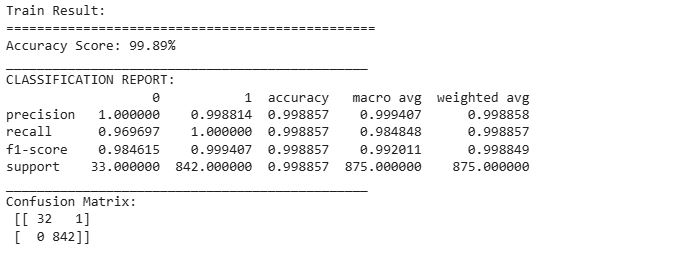


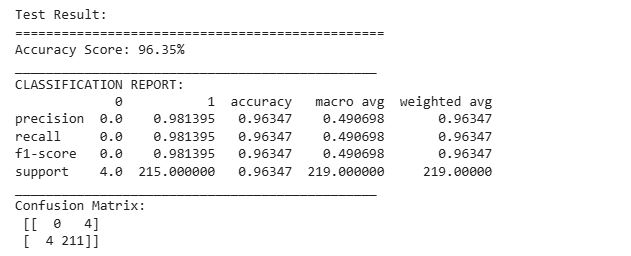




1: testing accuracy is low than training accuracy

2: also there is a overfitting

3: also null accuracy 0.9817 is greater than test score 96.35%

4: auc(area under the curve value is not good)

5: confusion matrix at test score value is high as compare to other model (fp are high)

**Talking about precision and recall at test set**

**1: to predict high revenue (1) our precision is 0.98 and recall is 0.981 which is good
2: to predict low revenue (0) our precison is 0.00 and recall is 0.00 which is worst  
hence it is predicting high revenue good in test set but not low revenue**

**conclusion : hence in random forest it is predicting high revenue good but not predicting the low revenue**

# **COMPARING ALL THE MODEL PERFROMANCE ON THE BASES OF PRECISION RECALL AND ACCURACY**

 **Talking about accuracy :**

**1: Talking about the test accuracy (in knn ,and logistic regression test accuracy is high than training accuracy means no overfitting ) while in decision tree and random forest traing accuracy is high than testing
2: also null accuracy is same as testing accuracy in knn and logistic regression , while in decision tree and random forest null acccuracy is high than training set which is not good**



**comparing precision and recall of models at test set :**

**precision of high revenue :**

 in logistic regression and knn for high revenue our precision is 0.9817 which
is good means these model are predicting high revenue good
while in random forest our precsion is 0.9813 and at decision tree classifierr is 0.988

means all the model precision are good means performing good in predicting high revenue .

**recall of high revenue :**

in logistic regreesion and knn our recall(means how many revenue caught) value is 1.00 means means it is very good

while in decision tree 0.953 and random forest 0.981 our recall are also good
in predicting revenue

**precision of low reveneue:**
precision of low revenue of all the models is 0.00

**recall of low revenue:**
recall pof all the model of low revenue is also 0.00 (means the models are not caughting the low revenue )

which is not good (means the model is not predicting the low revenue )

**Due to the class imbalance our models are not predicting for the low reveneue but for high revenue or precision and recall is good**

**comming to the conclusion i think model knn and logisitic regreesion are performing good compared to random forest and decision tree (because model knn and logistic regression testing accuracy high than training .no overfitting , also precision and recall are also good and null accuracy of these model is also same as testing )**



**24. Tune the Random Forest model by adjusting hyperparameters (e.g., number of trees,
maximum depth). How do these changes affect the model’s performance?**

In [ ]:
from sklearn.model_selection import GridSearchCV


rrf_clf = RandomForestClassifier(random_state=42)

param_grid = {
   'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}

rf_grid_search = GridSearchCV(estimator=rrf_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

rf_grid_search.fit(X_train, y_train)
best_params = rf_grid_search.best_params_
print(f"Best parameters: {best_params}")

lr_clf = RandomForestClassifier(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Train Result:
Accuracy Score: 96.23%
_______________________________________________
CLASSIFICATION REPORT:
              0           1  accuracy   macro avg  weighted avg
precision   0.0    0.962286  0.962286    0.481143      0.925994
recall      0.0    1.000000  0.962286    0.500000      0.962286
f1-score    0.0    0.980780  0.962286    0.490390      0.943791
support    33.0  842.000000  0.962286  875.000000    875.000000
_______________________________________________
Confusion Matrix: 
 [[  0  33]
 [  0 842]]

Test Result:
Accuracy Score: 98.17%
_______________________________________________
CLASSIFICATION REPORT:
             0           1  accuracy   macro avg  weighted avg
precision  0.0    0.981735  0.981735    0.490868      0.963804
recall     0.0    1.000000  0.981735    0.500000      0.981735
f1-score   0.0    0.990783  0.981735    0.495392      0.972687
support

**After Tuning the random forest algorithm we found that**

1: our testing score become higher than training score

2: also their is no overfitting

3: testing accuracy and null accurcay 0.9817 are same

4: precision and recall at high revenue is also good

5: precision anr recall at low nrevenue is still 0.00 ( due to class imbalance)

